In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import svm
from sklearn import naive_bayes
from sklearn import neighbors
from sklearn import tree
from sklearn import ensemble
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', 100)

In [24]:
df = pd.read_csv('data/HRAnalytics/aug_train.csv', encoding='utf-8')
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [25]:
df.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [26]:
df[df.dtypes[df.dtypes == 'object'].index] = df[df.dtypes[df.dtypes == 'object'].index].fillna('UNK')

In [27]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,UNK,UNK,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,UNK,No relevent experience,Full time course,Graduate,STEM,5,UNK,UNK,never,83,0.0
3,33241,city_115,0.789,UNK,No relevent experience,UNK,Graduate,Business Degree,<1,UNK,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,UNK,UNK,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,UNK,UNK,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,UNK,<1,500-999,Pvt Ltd,2,97,0.0


In [28]:
df.drop(['enrollee_id', 'city'], axis=1, inplace=True)
df = pd.get_dummies(data=df)

In [29]:
df.dtypes

city_development_index    float64
training_hours              int64
target                    float64
gender_Female               uint8
gender_Male                 uint8
                           ...   
last_new_job_3              uint8
last_new_job_4              uint8
last_new_job_>4             uint8
last_new_job_UNK            uint8
last_new_job_never          uint8
Length: 72, dtype: object

In [30]:
df['target'] = df['target'].astype('int64')

In [31]:
df

,city_development_index,training_hours,target,gender_Female,gender_Male,gender_Other,gender_UNK,relevent_experience_Has relevent experience,relevent_experience_No relevent experience,enrolled_university_Full time course,enrolled_university_Part time course,enrolled_university_UNK,enrolled_university_no_enrollment,education_level_Graduate,education_level_High School,education_level_Masters,education_level_Phd,education_level_Primary School,education_level_UNK,major_discipline_Arts,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,major_discipline_UNK,experience_1,experience_10,experience_11,experience_12,experience_13,experience_14,experience_15,experience_16,experience_17,experience_18,experience_19,experience_2,experience_20,experience_3,experience_4,experience_5,experience_6,experience_7,experience_8,experience_9,experience_<1,experience_>20,experience_UNK,company_size_10/49,company_size_100-500,company_size_1000-4999,company_size_10000+,company_size_50-99,company_size_500-999,company_size_5000-9999,company_size_<10,company_size_UNK,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,company_type_UNK,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_UNK,last_new_job_never
0,0.920,36,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0
1,0.776,47,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,0.624,83,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,0.789,52,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,0.767,8,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.878,42,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0
19154,0.920,52,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
19155,0.920,44,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
19156,0.802,97,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


<AxesSubplot:>

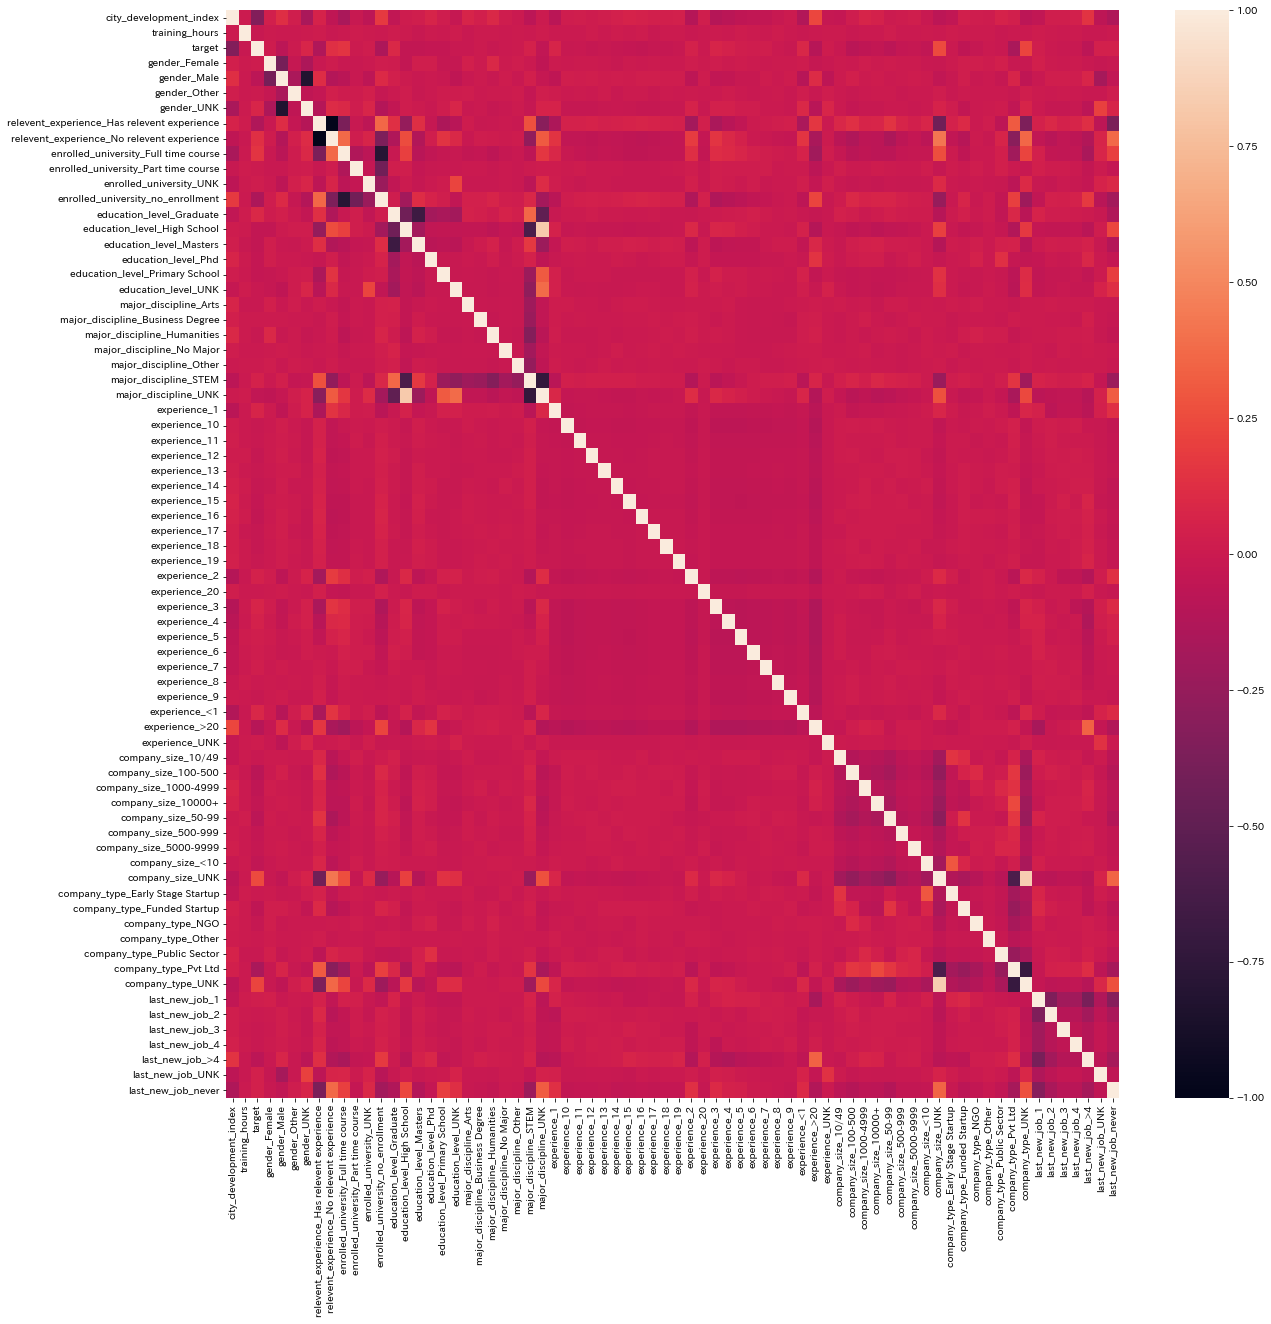

In [32]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr())

In [34]:
X = df.drop(['target'], axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
print(X_train.shape)
print(X_test.shape)

(15326, 71)
(3832, 71)


In [35]:
models = [linear_model.LogisticRegression(),
          neighbors.KNeighborsClassifier(),
          svm.SVC(),
          naive_bayes.GaussianNB(),
          tree.DecisionTreeClassifier(max_depth=3),
          ensemble.RandomForestClassifier(max_depth=3),
          ensemble.GradientBoostingClassifier()]

In [36]:
df_model_comp = pd.DataFrame()
for model in models:
    dic = dict()
    dic['モデル名'] = model.__class__.__name__
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    dic['Accuracy(訓練)'] = metrics.accuracy_score(y_train, y_pred)
    dic['Precision(訓練)'] = metrics.precision_score(y_train, y_pred)
    dic['Recall(訓練)'] = metrics.recall_score(y_train, y_pred)
    dic['F1(訓練)'] = metrics.f1_score(y_train, y_pred)
    y_pred = model.predict(X_test)
    dic['Accuracy(テスト)'] = metrics.accuracy_score(y_test, y_pred)
    dic['Precision(テスト)'] = metrics.precision_score(y_test, y_pred)
    dic['Recall(テスト)'] = metrics.recall_score(y_test, y_pred)
    dic['F1(テスト)'] = metrics.f1_score(y_test, y_pred)
    df_model_comp = df_model_comp.append(dic,ignore_index=True)
df_model_comp


C:\Users\ishih\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ishih\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ishih\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero

,モデル名,Accuracy(訓練),Precision(訓練),Recall(訓練),F1(訓練),Accuracy(テスト),Precision(テスト),Recall(テスト),F1(テスト)
0,LogisticRegression,0.773522,0.591360,0.267706,0.368565,0.767745,0.612200,0.282981,0.387052
1,KNeighborsClassifier,0.809735,0.685312,0.424154,0.523996,0.733038,0.474315,0.278953,0.351300
2,SVC,0.753099,0.000000,0.000000,0.000000,0.740866,0.000000,0.000000,0.000000
3,GaussianNB,0.675910,0.400438,0.628700,0.489254,0.674322,0.415730,0.633434,0.501995
4,DecisionTreeClassifier,0.782200,0.582288,0.417019,0.485987,0.785491,0.627043,0.424975,0.506603
5,RandomForestClassifier,0.753099,0.000000,0.000000,0.000000,0.740866,0.000000,0.000000,0.000000
6,GradientBoostingClassifier,0.805102,0.613050,0.571089,0.591326,0.794885,0.619930,0.538771,0.576509


In [37]:
X_train.dtypes[X_train.dtypes != 'uint8'].index

Index(['city_development_index', 'training_hours'], dtype='object')

In [38]:
from sklearn.preprocessing import StandardScaler

scaling_columns = X_train.dtypes[X_train.dtypes != 'uint8'].index
scaler = StandardScaler().fit(X_train[scaling_columns])

scaled_train = pd.DataFrame(scaler.transform(X_train[scaling_columns]), columns=scaling_columns, index=X_train.index)
X_train.update(scaled_train)

scaled_test = pd.DataFrame(scaler.transform(X_test[scaling_columns]), columns=scaling_columns, index=X_test.index)
X_test.update(scaled_test)

In [39]:
df_model_comp = pd.DataFrame()
for model in models:
    dic = dict()
    dic['モデル名'] = model.__class__.__name__
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    dic['Accuracy(訓練)'] = metrics.accuracy_score(y_train, y_pred)
    dic['Precision(訓練)'] = metrics.precision_score(y_train, y_pred)
    dic['Recall(訓練)'] = metrics.recall_score(y_train, y_pred)
    dic['F1(訓練)'] = metrics.f1_score(y_train, y_pred)
    y_pred = model.predict(X_test)
    dic['Accuracy(テスト)'] = metrics.accuracy_score(y_test, y_pred)
    dic['Precision(テスト)'] = metrics.precision_score(y_test, y_pred)
    dic['Recall(テスト)'] = metrics.recall_score(y_test, y_pred)
    dic['F1(テスト)'] = metrics.f1_score(y_test, y_pred)
    df_model_comp = df_model_comp.append(dic,ignore_index=True)
df_model_comp

C:\Users\ishih\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ishih\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ishih\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero

,モデル名,Accuracy(訓練),Precision(訓練),Recall(訓練),F1(訓練),Accuracy(テスト),Precision(テスト),Recall(テスト),F1(テスト)
0,LogisticRegression,0.773196,0.587401,0.273520,0.373242,0.769572,0.620614,0.284995,0.390614
1,KNeighborsClassifier,0.827417,0.687274,0.552326,0.612454,0.763309,0.554987,0.437059,0.489014
2,SVC,0.811562,0.664343,0.478594,0.556375,0.788100,0.637329,0.422961,0.508475
3,GaussianNB,0.675910,0.400438,0.628700,0.489254,0.674322,0.415730,0.633434,0.501995
4,DecisionTreeClassifier,0.782200,0.582288,0.417019,0.485987,0.785491,0.627043,0.424975,0.506603
5,RandomForestClassifier,0.753099,0.000000,0.000000,0.000000,0.740866,0.000000,0.000000,0.000000
6,GradientBoostingClassifier,0.805102,0.613050,0.571089,0.591326,0.794885,0.619930,0.538771,0.576509


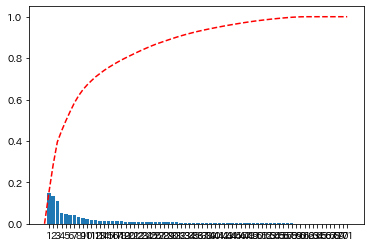

In [40]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
plt.bar([n for n in range(1, len(pca.explained_variance_ratio_)+1)], pca.explained_variance_ratio_)
ev_ratio = pca.explained_variance_ratio_
ev_ratio = np.hstack([0,ev_ratio.cumsum()])
plt.plot(ev_ratio, color='red', linestyle='dashed')
plt.xticks(range(1, X_train.shape[-1]+1))
plt.show()

In [41]:
n = 20
columns=[f'PC{i+1}' for i in range(n)]
X_train_pca = pd.DataFrame(X_train_pca[:,:n], columns=columns)
X_test_pca = pd.DataFrame(X_test_pca[:,:n], columns=columns)

C:\Users\ishih\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ishih\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ishih\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero

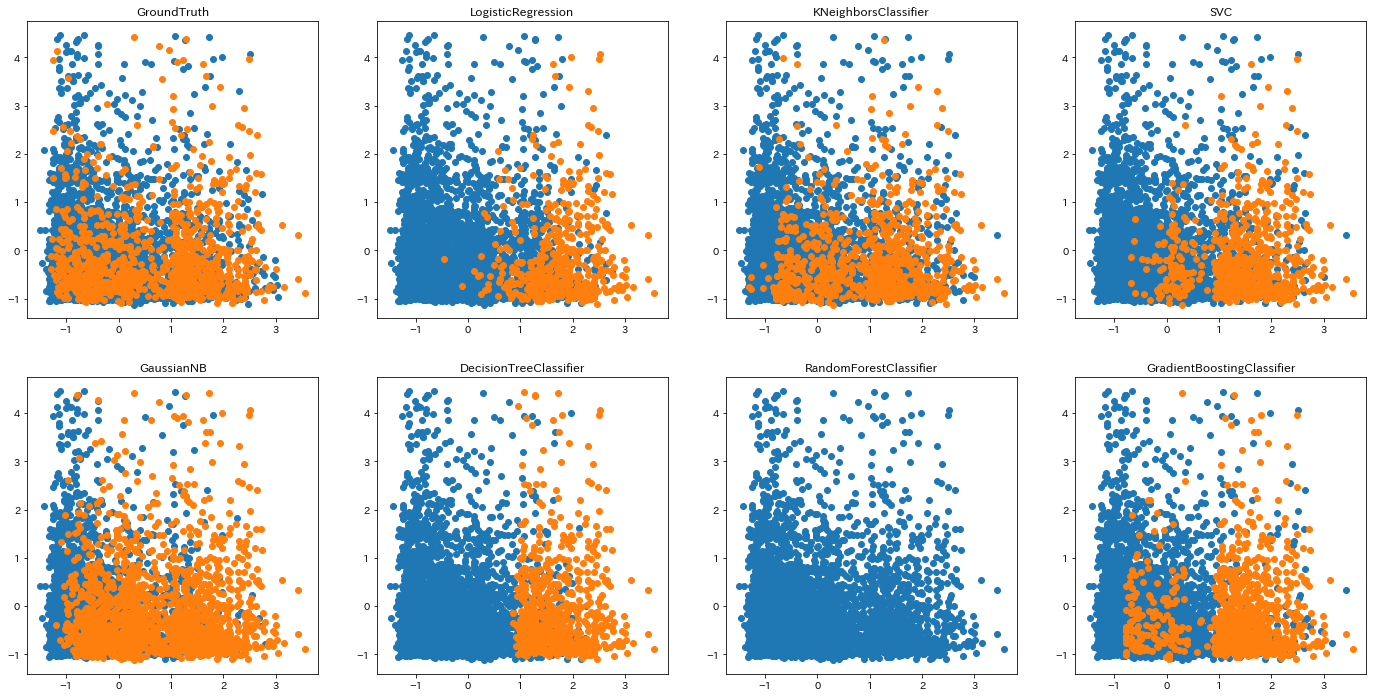

,モデル名,Accuracy(訓練),Precision(訓練),Recall(訓練),F1(訓練),Accuracy(テスト),Precision(テスト),Recall(テスト),F1(テスト)
0,LogisticRegression,0.773196,0.587401,0.273520,0.373242,0.769572,0.620614,0.284995,0.390614
1,KNeighborsClassifier,0.827417,0.687274,0.552326,0.612454,0.763309,0.554987,0.437059,0.489014
2,SVC,0.811562,0.664343,0.478594,0.556375,0.788100,0.637329,0.422961,0.508475
3,GaussianNB,0.675910,0.400438,0.628700,0.489254,0.674322,0.415730,0.633434,0.501995
4,DecisionTreeClassifier,0.782200,0.582288,0.417019,0.485987,0.785491,0.627043,0.424975,0.506603
5,RandomForestClassifier,0.753099,0.000000,0.000000,0.000000,0.740866,0.000000,0.000000,0.000000
6,GradientBoostingClassifier,0.805102,0.613050,0.571089,0.591326,0.794885,0.619930,0.538771,0.576509


In [42]:
df_model_comp = pd.DataFrame()

fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(24.0,12.0))
ax = ax.flatten()
for j in np.unique(y_test):
    X_tmp = X_test_pca[y_test.values == j]
    ax[0].scatter(X_tmp['PC1'], X_tmp['PC2'], label=j)
ax[0].set_title('GroundTruth')

for i, model in enumerate(models):
    dic = dict()
    dic['モデル名'] = model.__class__.__name__
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    dic['Accuracy(訓練)'] = metrics.accuracy_score(y_train, y_pred)
    dic['Precision(訓練)'] = metrics.precision_score(y_train, y_pred)
    dic['Recall(訓練)'] = metrics.recall_score(y_train, y_pred)
    dic['F1(訓練)'] = metrics.f1_score(y_train, y_pred)
    y_pred = model.predict(X_test)
    dic['Accuracy(テスト)'] = metrics.accuracy_score(y_test, y_pred)
    dic['Precision(テスト)'] = metrics.precision_score(y_test, y_pred)
    dic['Recall(テスト)'] = metrics.recall_score(y_test, y_pred)
    dic['F1(テスト)'] = metrics.f1_score(y_test, y_pred)
    df_model_comp = df_model_comp.append(dic,ignore_index=True)
    for j in np.unique(y_pred):
        X_tmp = X_test_pca[y_pred == j]
        ax[i+1].scatter(X_tmp['PC1'], X_tmp['PC2'], label=j)
    ax[i+1].set_title(model.__class__.__name__)
plt.show()

df_model_comp